In [3]:
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')


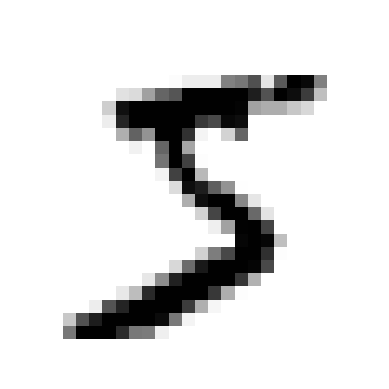

5


In [4]:
def show_image(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

show_image(mnist.data[0])
print(mnist.target[0])

The code above will display the image using matplotlib

In [5]:
x_train, x_test, y_train, y_test = mnist.data[:60000], mnist.data[60000:], mnist.target[:60000], mnist.target[60000:]

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier()
SGD_clf.fit(x_train, y_train_5)

SGDClassifier()

In [6]:
value = 99
some_digit = mnist.data[value]
some_digit_val = mnist.target[value]

is_5 = SGD_clf.predict([some_digit])[0]
print(some_digit_val, is_5)

1 False


In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(SGD_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.96675, 0.96865, 0.91585])

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SGD_clf, x_train, y_train_5, cv=3)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53663,   916],
       [ 1409,  4012]], dtype=int64)

In [14]:
from sklearn.metrics import recall_score, precision_score
print("recall:\t\t" + str(recall_score(y_train_5, y_train_pred)))
print("precision:\t" + str(precision_score(y_train_5, y_train_pred)))

recall:		0.7400848551927689
precision:	0.8141233766233766


In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7753406126195769

## Threshold

In [24]:
y_scores = SGD_clf.decision_function([mnist.data[0]])
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(f'Digit Value {mnist.target[0]}\nDigit score: {y_scores[0]}\nResult with threshold {threshold}: {y_some_digit_pred[0]}')

Digit Value 5
Digit score: 4163.481693706179
Result with threshold 0: True


In [26]:
y_scores = cross_val_predict(SGD_clf, x_train, y_train_5, cv=3, method='decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

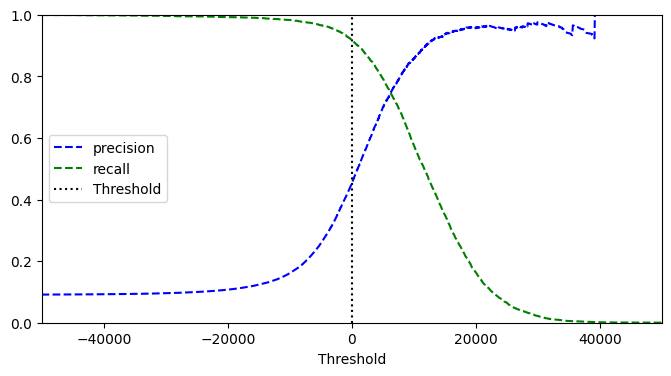

In [37]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g--", label="recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Threshold")

plt.legend(loc="center left")
plt.axis([-50000, 50000, 0, 1])
plt.xlabel("Threshold")
plt.show()

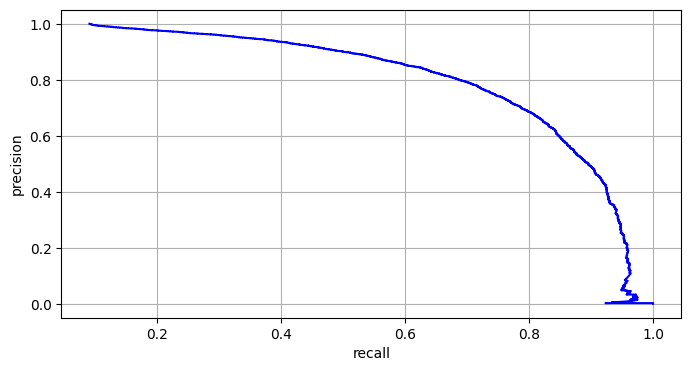

In [40]:
plt.figure(figsize=(8,4))
plt.plot(precisions, recalls, "b")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.show()

# Multiclass classification

> Now that we have classified one number we will use a OvO classifier to classify all the numbers using SVC on a sample set of 2000 numbers

In [42]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:2000], y_train[:2000])


SVC(random_state=42)

In [53]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(4)

array([[-0.2987,  9.3038,  7.2642,  2.831 ,  4.9863,  1.7302,  0.7216,
         8.2788,  6.1306,  3.8482]])

In [ ]:
y_train_pred = cross_val_predict